# Explore here

In [17]:
import requests
from IPython.display import JSON
import pandas as pd

url= "https://api.worldbank.org/v2/indicator"
params = {
    "format" : "json",
    "per_page": 500,
    "page": 1
}

response = requests.get(url, params=params, timeout=30)
response.raise_for_status() #similar to try catch error
payload = response.json()
print(response.status_code)
print("total pages: ", payload[0]['pages'])
total_pages = payload[0]['pages']
all_indicators_list = []
for page in range(1, total_pages + 1):
    params["page"] = page
    response = requests.get(url, params=params, timeout=30)
    response.raise_for_status()
    payload = response.json()
    for indicator in payload[1]:
        all_indicators_list.append({"id": indicator['id'], "name": indicator['name']})
  
    



200
total pages:  59


The goal is to analyze the socioeconomic and environmental evolution of 5 countries chosen by you between 2010 and 2024.

Countries: Spain, Mexico, Venezuela, Argentina, Colombia
Indicators: GDP, Trade, Exports, GINI, Tobacco, Alcohol

In [ ]:
df_indicators = pd.DataFrame(all_indicators_list)
# print(df_indicators.head())
selected_ids = [
    "SH.PRV.SMOK",      # tobacco
    "SH.ALC.PCAP.LIT",  # alcohol
    "NY.GDP.PCAP.CD",   # GDP per capita
    "NE.EXP.GNFS.CD",   # exports
    "SI.POV.GINI",      # Gini index
    "SP.POP.TOTL",      # population
    "SP.DYN.LE00.IN",   # life expectancy
    "SP.POP.GROW",      # population growth
]
selected_indicators = {}
for ind_id in selected_ids:
    if ind_id in df_indicators['id'].values:
        row = df_indicators[df_indicators["id"] == ind_id].iloc[0]
        selected_indicators[ind_id] = {
            "id": row["id"],
            "name": row["name"]
        }
print(selected_indicators)

{'SH.PRV.SMOK': {'id': 'SH.PRV.SMOK', 'name': 'Prevalence of current tobacco use (% of adults)'}, 'NY.GDP.PCAP.CD': {'id': 'NY.GDP.PCAP.CD', 'name': 'GDP per capita (current US$)'}, 'NE.EXP.GNFS.CD': {'id': 'NE.EXP.GNFS.CD', 'name': 'Exports of goods and services (current US$)'}, 'SI.POV.GINI': {'id': 'SI.POV.GINI', 'name': 'Gini index'}, 'SP.POP.TOTL': {'id': 'SP.POP.TOTL', 'name': 'Population, total'}, 'SP.DYN.LE00.IN': {'id': 'SP.DYN.LE00.IN', 'name': 'Life expectancy at birth, total (years)'}, 'SP.POP.GROW': {'id': 'SP.POP.GROW', 'name': 'Population growth (annual %)'}}


In [ ]:

COUNTRY_URL = "https://api.worldbank.org/v2/country/"
country_codes = ["MX", "ES", "AR", "VE", "CL"]
params = {
    "format": "json"
    }
country_list = []
for country_code in country_codes:
    url = f"{COUNTRY_URL}{country_code}"
    print(url)
    response = requests.get(url, params=params, timeout=30)
    response.raise_for_status()
    payload = response.json()
    print(f"payload for {country_code}: {payload}")
    country_list.append({"id": payload[1][0]['id'], "name": payload[1][0]['name']})
    





https://api.worldbank.org/v2/country/MX
payload for MX: [{'page': 1, 'pages': 1, 'per_page': '50', 'total': 1}, [{'id': 'MEX', 'iso2Code': 'MX', 'name': 'Mexico', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': 'LAC', 'iso2code': 'XJ', 'value': 'Latin America & Caribbean (excluding high income)'}, 'incomeLevel': {'id': 'UMC', 'iso2code': 'XT', 'value': 'Upper middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Mexico City', 'longitude': '-99.1276', 'latitude': '19.427'}]]
https://api.worldbank.org/v2/country/ES
payload for ES: [{'page': 1, 'pages': 1, 'per_page': '50', 'total': 1}, [{'id': 'ESP', 'iso2Code': 'ES', 'name': 'Spain', 'region': {'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'}, 'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value'

In [20]:
print(country_list)
countries_id = [country['id'] for country in country_list]
countries_id = [country.lower() for country in countries_id]
print(countries_id)

[{'id': 'MEX', 'name': 'Mexico'}, {'id': 'ESP', 'name': 'Spain'}, {'id': 'ARG', 'name': 'Argentina'}, {'id': 'VEN', 'name': 'Venezuela, RB'}, {'id': 'CHL', 'name': 'Chile'}]
['mex', 'esp', 'arg', 'ven', 'chl']


In [30]:

country_table = []

START_YEAR = 2000
END_YEAR = 2020

for indicator_id in selected_ids:
    for country_id in countries_id:
        response = requests.get(
            url=f"https://api.worldbank.org/v2/country/{country_id}/indicator/{indicator_id}",
            params={
                "format": "json",
                "date": f"{START_YEAR}:{END_YEAR}",
                "per_page": 100
            },
            timeout=30
        )
        response.raise_for_status()
        payload = response.json()

        if len(payload) < 2:
            continue

        for entry in payload[1]:
            country_table.append({
                "indicator_id": indicator_id,
                "indicator_name": entry["indicator"]["value"],
                "country": entry["country"]["value"],
                "year": int(entry["date"]),
                "value": entry["value"]
            })


In [ ]:
df = pd.DataFrame(country_table)

df = df.dropna(subset=["value"])
df["value"] = pd.to_numeric(df["value"], errors="coerce")

print(df.head())

   indicator_id                                   indicator_name country  \
0   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)  Mexico   
5   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)  Mexico   
10  SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)  Mexico   
13  SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)  Mexico   
15  SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)  Mexico   

    year  value  
0   2020   15.5  
5   2015   17.0  
10  2010   18.7  
13  2007   19.9  
15  2005   20.6  


In [ ]:
dfs_by_indicator = {
    ind: df[df["indicator_id"] == ind].copy()
    for ind in df["indicator_id"].unique()
}

print(dfs_by_indicator)

{'SH.PRV.SMOK':     indicator_id                                   indicator_name    country  \
0    SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)     Mexico   
5    SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)     Mexico   
10   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)     Mexico   
13   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)     Mexico   
15   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)     Mexico   
20   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)     Mexico   
21   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)      Spain   
26   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)      Spain   
31   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)      Spain   
34   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)      Spain   
36   SH.PRV.SMOK  Prevalence of current tobacco use (% of adults)      Spain   
41   SH.PRV.SMOK  Preval

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

*GDP per Capita Evolution (2010–2024)*

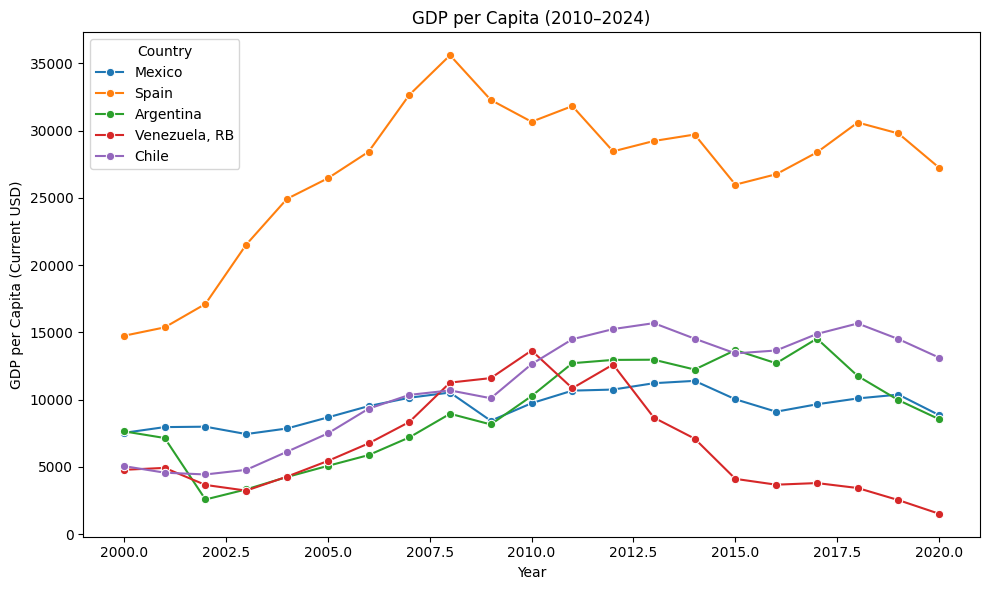

In [27]:
gdp_df = df[df["indicator_id"] == "NY.GDP.PCAP.CD"]

plt.figure(figsize=(10,6))
sns.lineplot(data=gdp_df, x="year", y="value", hue="country", marker="o")

plt.title("GDP per Capita (2010–2024)")
plt.ylabel("GDP per Capita (Current USD)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

*Tobacco and Alcohol Consumption Trends (2010–2024)*

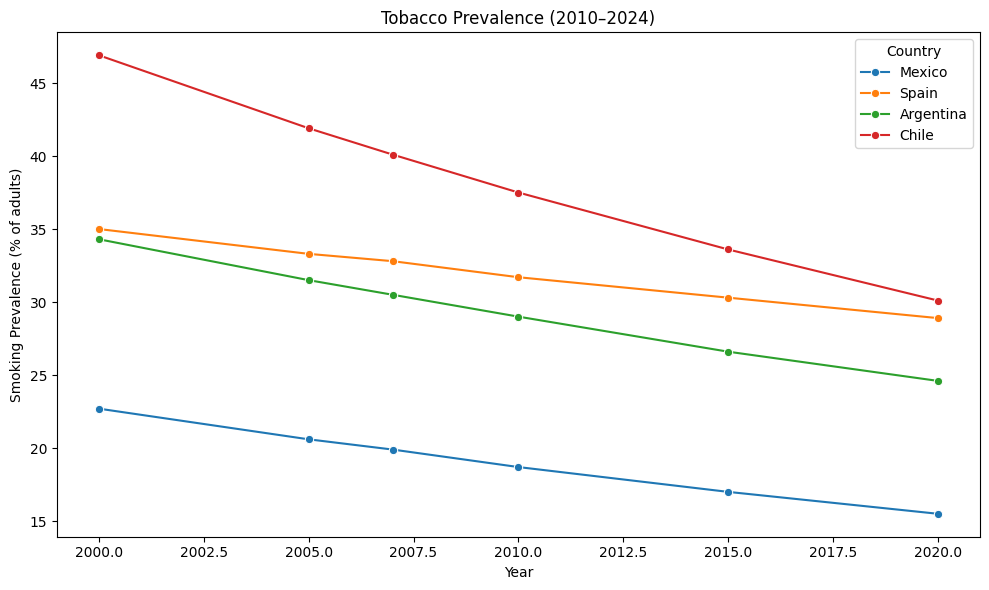

In [29]:
tobacco_df = df[df["indicator_id"] == "SH.PRV.SMOK"]

plt.figure(figsize=(10,6))
sns.lineplot(
    data=tobacco_df,
    x="year",
    y="value",
    hue="country",
    marker="o"
)

plt.title("Tobacco Prevalence (2010–2024)")
plt.ylabel("Smoking Prevalence (% of adults)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

In [31]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///world_bank_analysis.db")

print("Database created successfully.")


Database created successfully.


In [32]:
for indicator_id in df["indicator_id"].unique():
    
    # Clean table name
    table_name = f"indicator_{indicator_id.lower().replace('.', '_')}"
    
    indicator_df = df[df["indicator_id"] == indicator_id].copy()
    
    indicator_df.to_sql(
        table_name,
        con=engine,
        if_exists="replace",
        index=False
    )
    
    print(f"Saved table: {table_name}")


Saved table: indicator_sh_prv_smok
Saved table: indicator_ny_gdp_pcap_cd
Saved table: indicator_ne_exp_gnfs_cd
Saved table: indicator_si_pov_gini
Saved table: indicator_sp_pop_totl
Saved table: indicator_sp_dyn_le00_in
Saved table: indicator_sp_pop_grow


In [34]:
test_df = pd.read_sql(
    "SELECT * FROM indicator_ny_gdp_pcap_cd LIMIT 20",
    engine
)

print(test_df)


      indicator_id                indicator_name country  year         value
0   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2020   8841.270750
1   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2019  10369.555359
2   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2018  10084.793756
3   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2017   9649.278168
4   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2016   9097.923977
5   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2015  10021.238612
6   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2014  11391.377350
7   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2013  11216.800851
8   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2012  10744.133524
9   NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2011  10664.494403
10  NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2010   9728.800784
11  NY.GDP.PCAP.CD  GDP per capita (current US$)  Mexico  2009   8423.569332